In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-customers/credit_customers.csv


# **About The Data**

In [2]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Reading
credit_c=pd.read_csv("/kaggle/input/credit-risk-customers/credit_customers.csv")

# Taking Data Copy
credit=credit_c.copy()

# Data
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


# **Data Description**

In [4]:
# Data Info
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [5]:
# Changing object to category
cat= credit.select_dtypes(exclude=[np.number])
for i in list(cat.columns):
    credit[i]=credit[i].astype('category')

# Cheking Data Info
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [6]:
# Checking Null Values
credit.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [7]:
# Statistical Description
credit.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
# Spliting Personal Status
new= credit['personal_status'].str.split(" ",n=1,expand=True)
credit['gender']=new[0]
credit['marital_status']=new[1]

#Checking Data
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender,marital_status
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,none,own,2.0,skilled,1.0,yes,yes,good,male,single
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,none,own,1.0,skilled,1.0,none,yes,bad,female,div/dep/mar
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,none,own,1.0,unskilled resident,2.0,none,yes,good,male,single
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,none,for free,1.0,skilled,2.0,none,yes,good,male,single
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,none,for free,2.0,skilled,2.0,none,yes,bad,male,single


In [9]:
# Dropping Personal Status
credit.drop('personal_status',axis=1,inplace=True)

In [10]:
# Cheking categorical features
cat=credit.select_dtypes(exclude=[np.number])
cat.columns

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class', 'gender', 'marital_status'],
      dtype='object')

# **Data Visualization**

* Visualizing Categorical Features (Countplot)

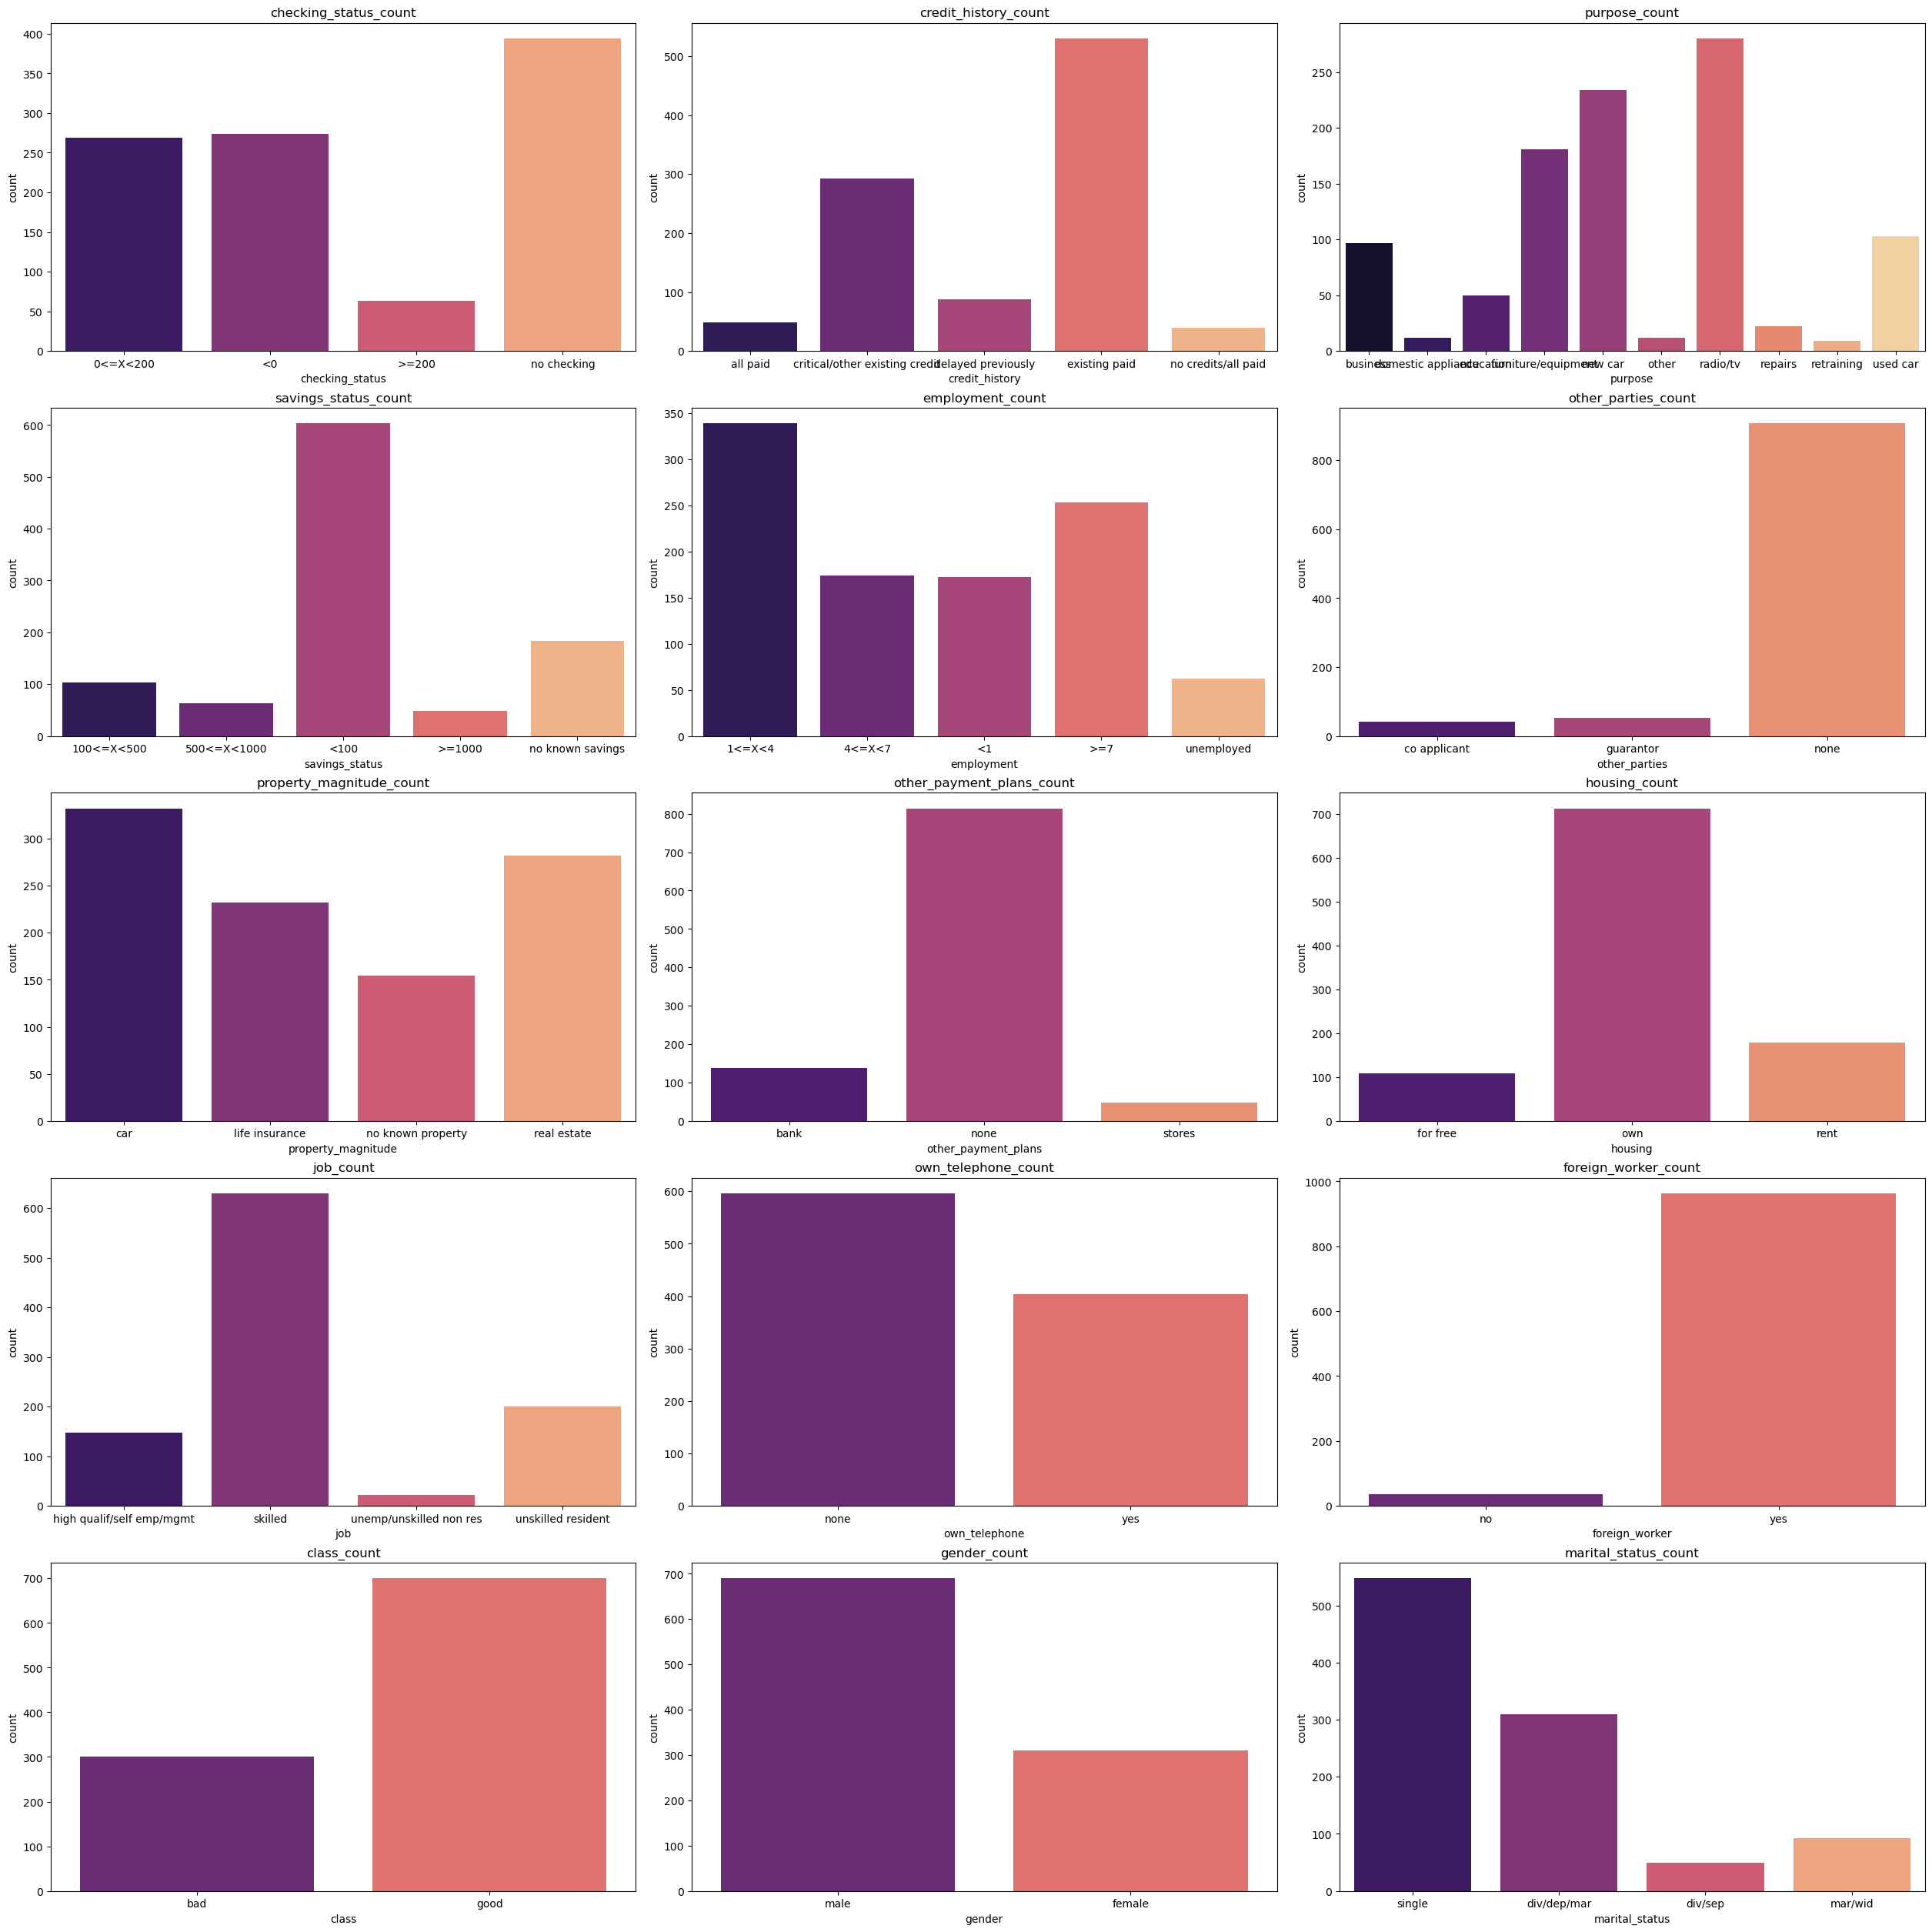

In [11]:
lst=['checking_status', 'credit_history', 'purpose', 'savings_status','employment', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone',
     'foreign_worker', 'class', 'gender', 'marital_status']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=credit,x=lst[i],palette='magma',)
    plt.title(lst[i]+'_count',)
plt.show()

* Visualizing Categorical Features (Pieplot)

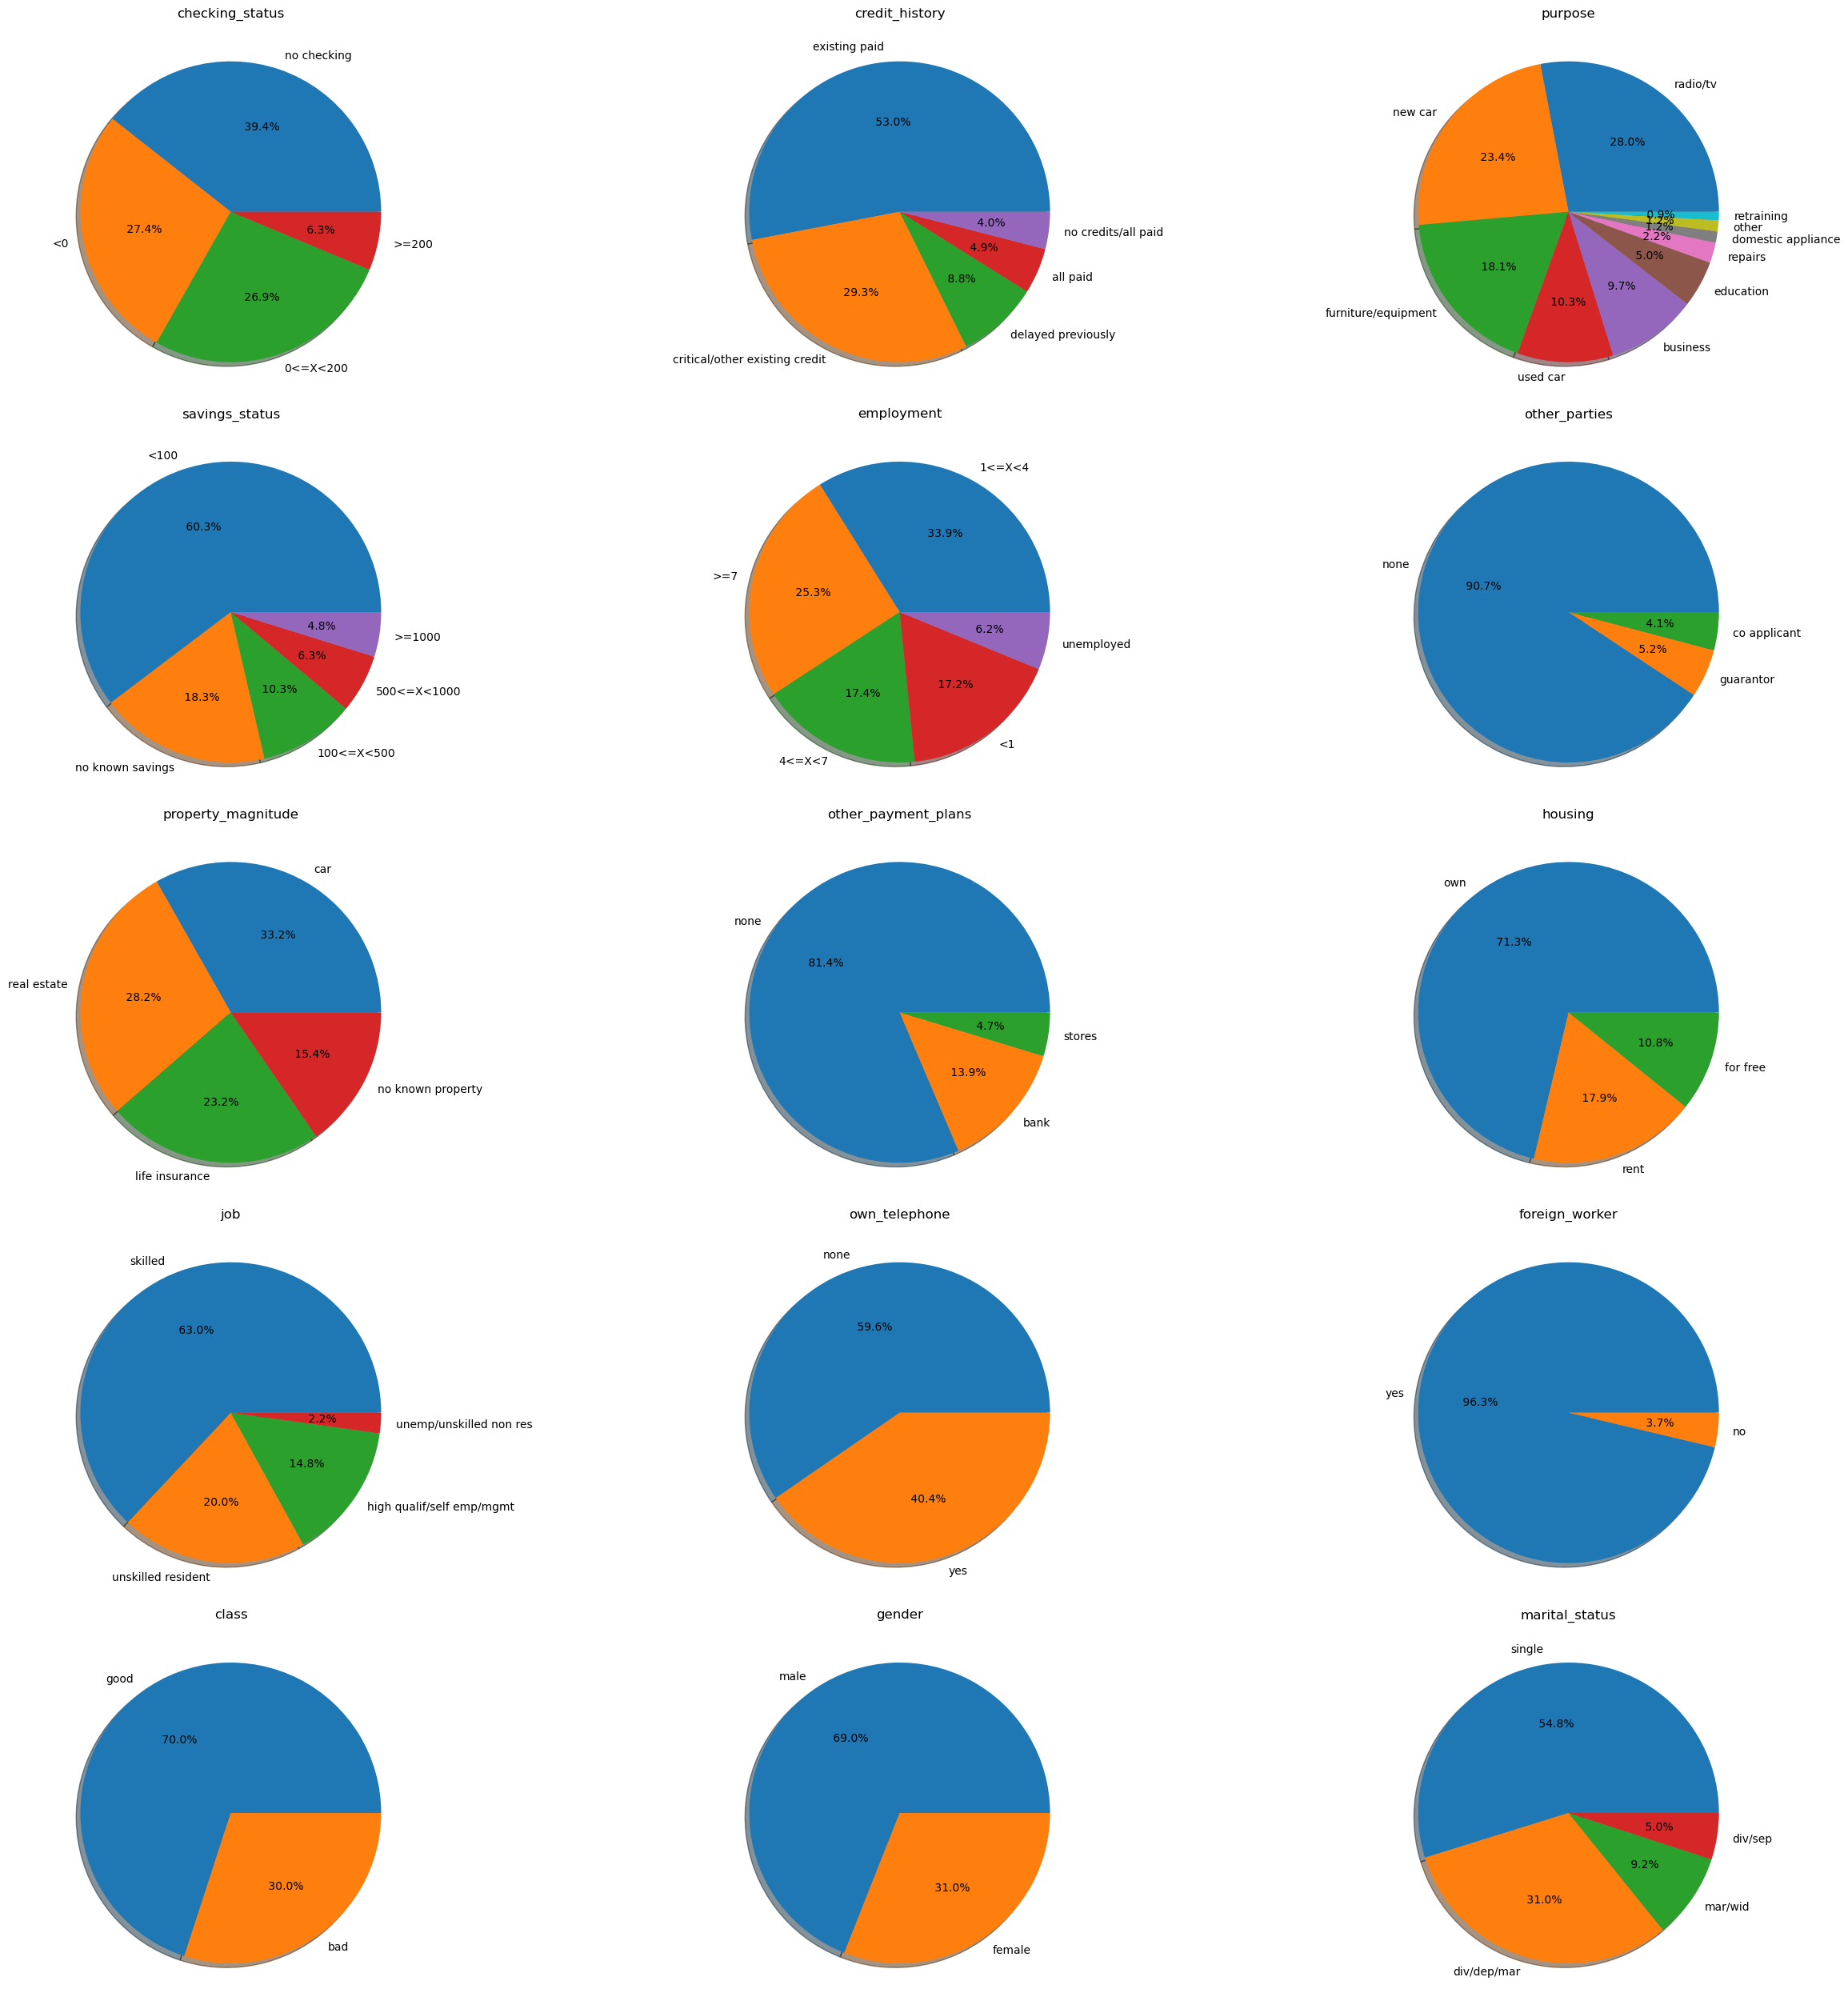

In [12]:
lst=['checking_status', 'credit_history', 'purpose', 'savings_status','employment', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone',
     'foreign_worker', 'class', 'gender', 'marital_status']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(5,3,i+1)
    a=credit[lst[i]].value_counts()
    lbl=a.index
    plt.pie(x=a,labels=lbl,autopct="% .1f%%",shadow=True)
    plt.title(lst[i])
plt.show()

In [13]:
# Numerical Features
num=credit.select_dtypes(include=[np.number])
num.columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

* Visualizing Numerical Features (KDEplot)

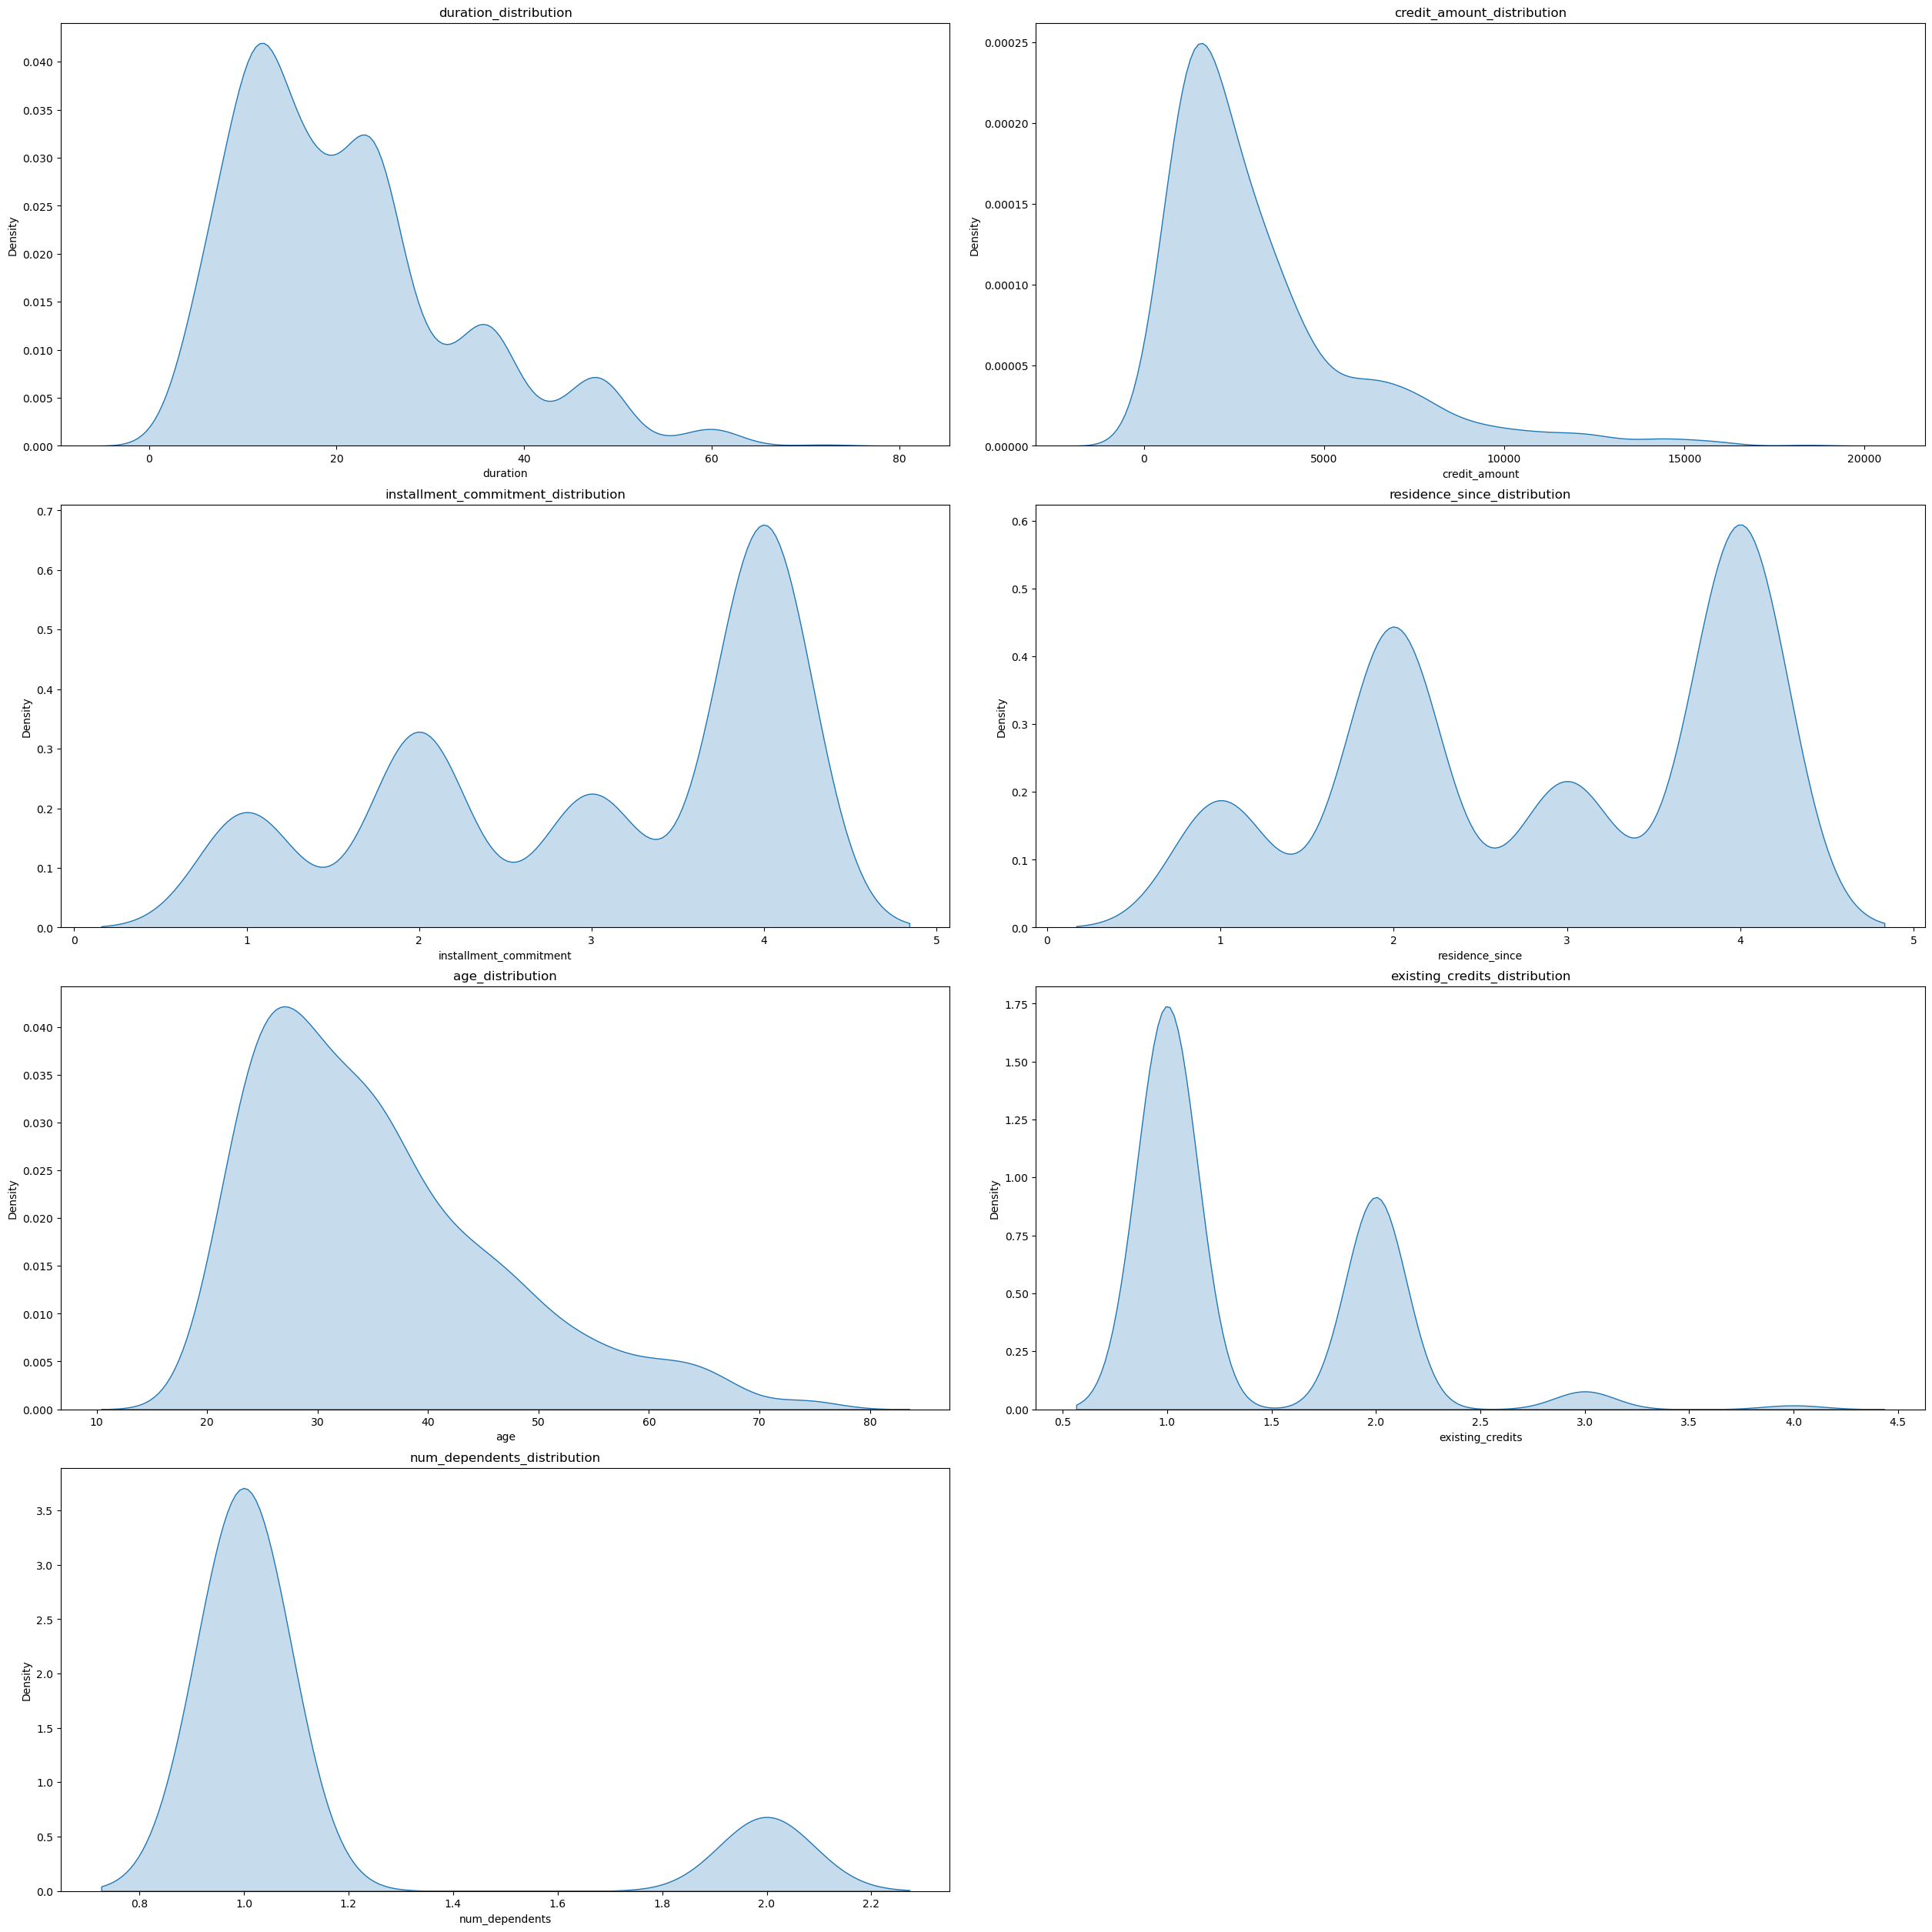

In [14]:
lst=['duration', 'credit_amount', 'installment_commitment','residence_since', 'age', 'existing_credits', 'num_dependents']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=credit,x=lst[i],shade=True)
    plt.title(lst[i]+'_distribution')
plt.show()

* Visualizing Numerical Features against the target feature (KDEplot)

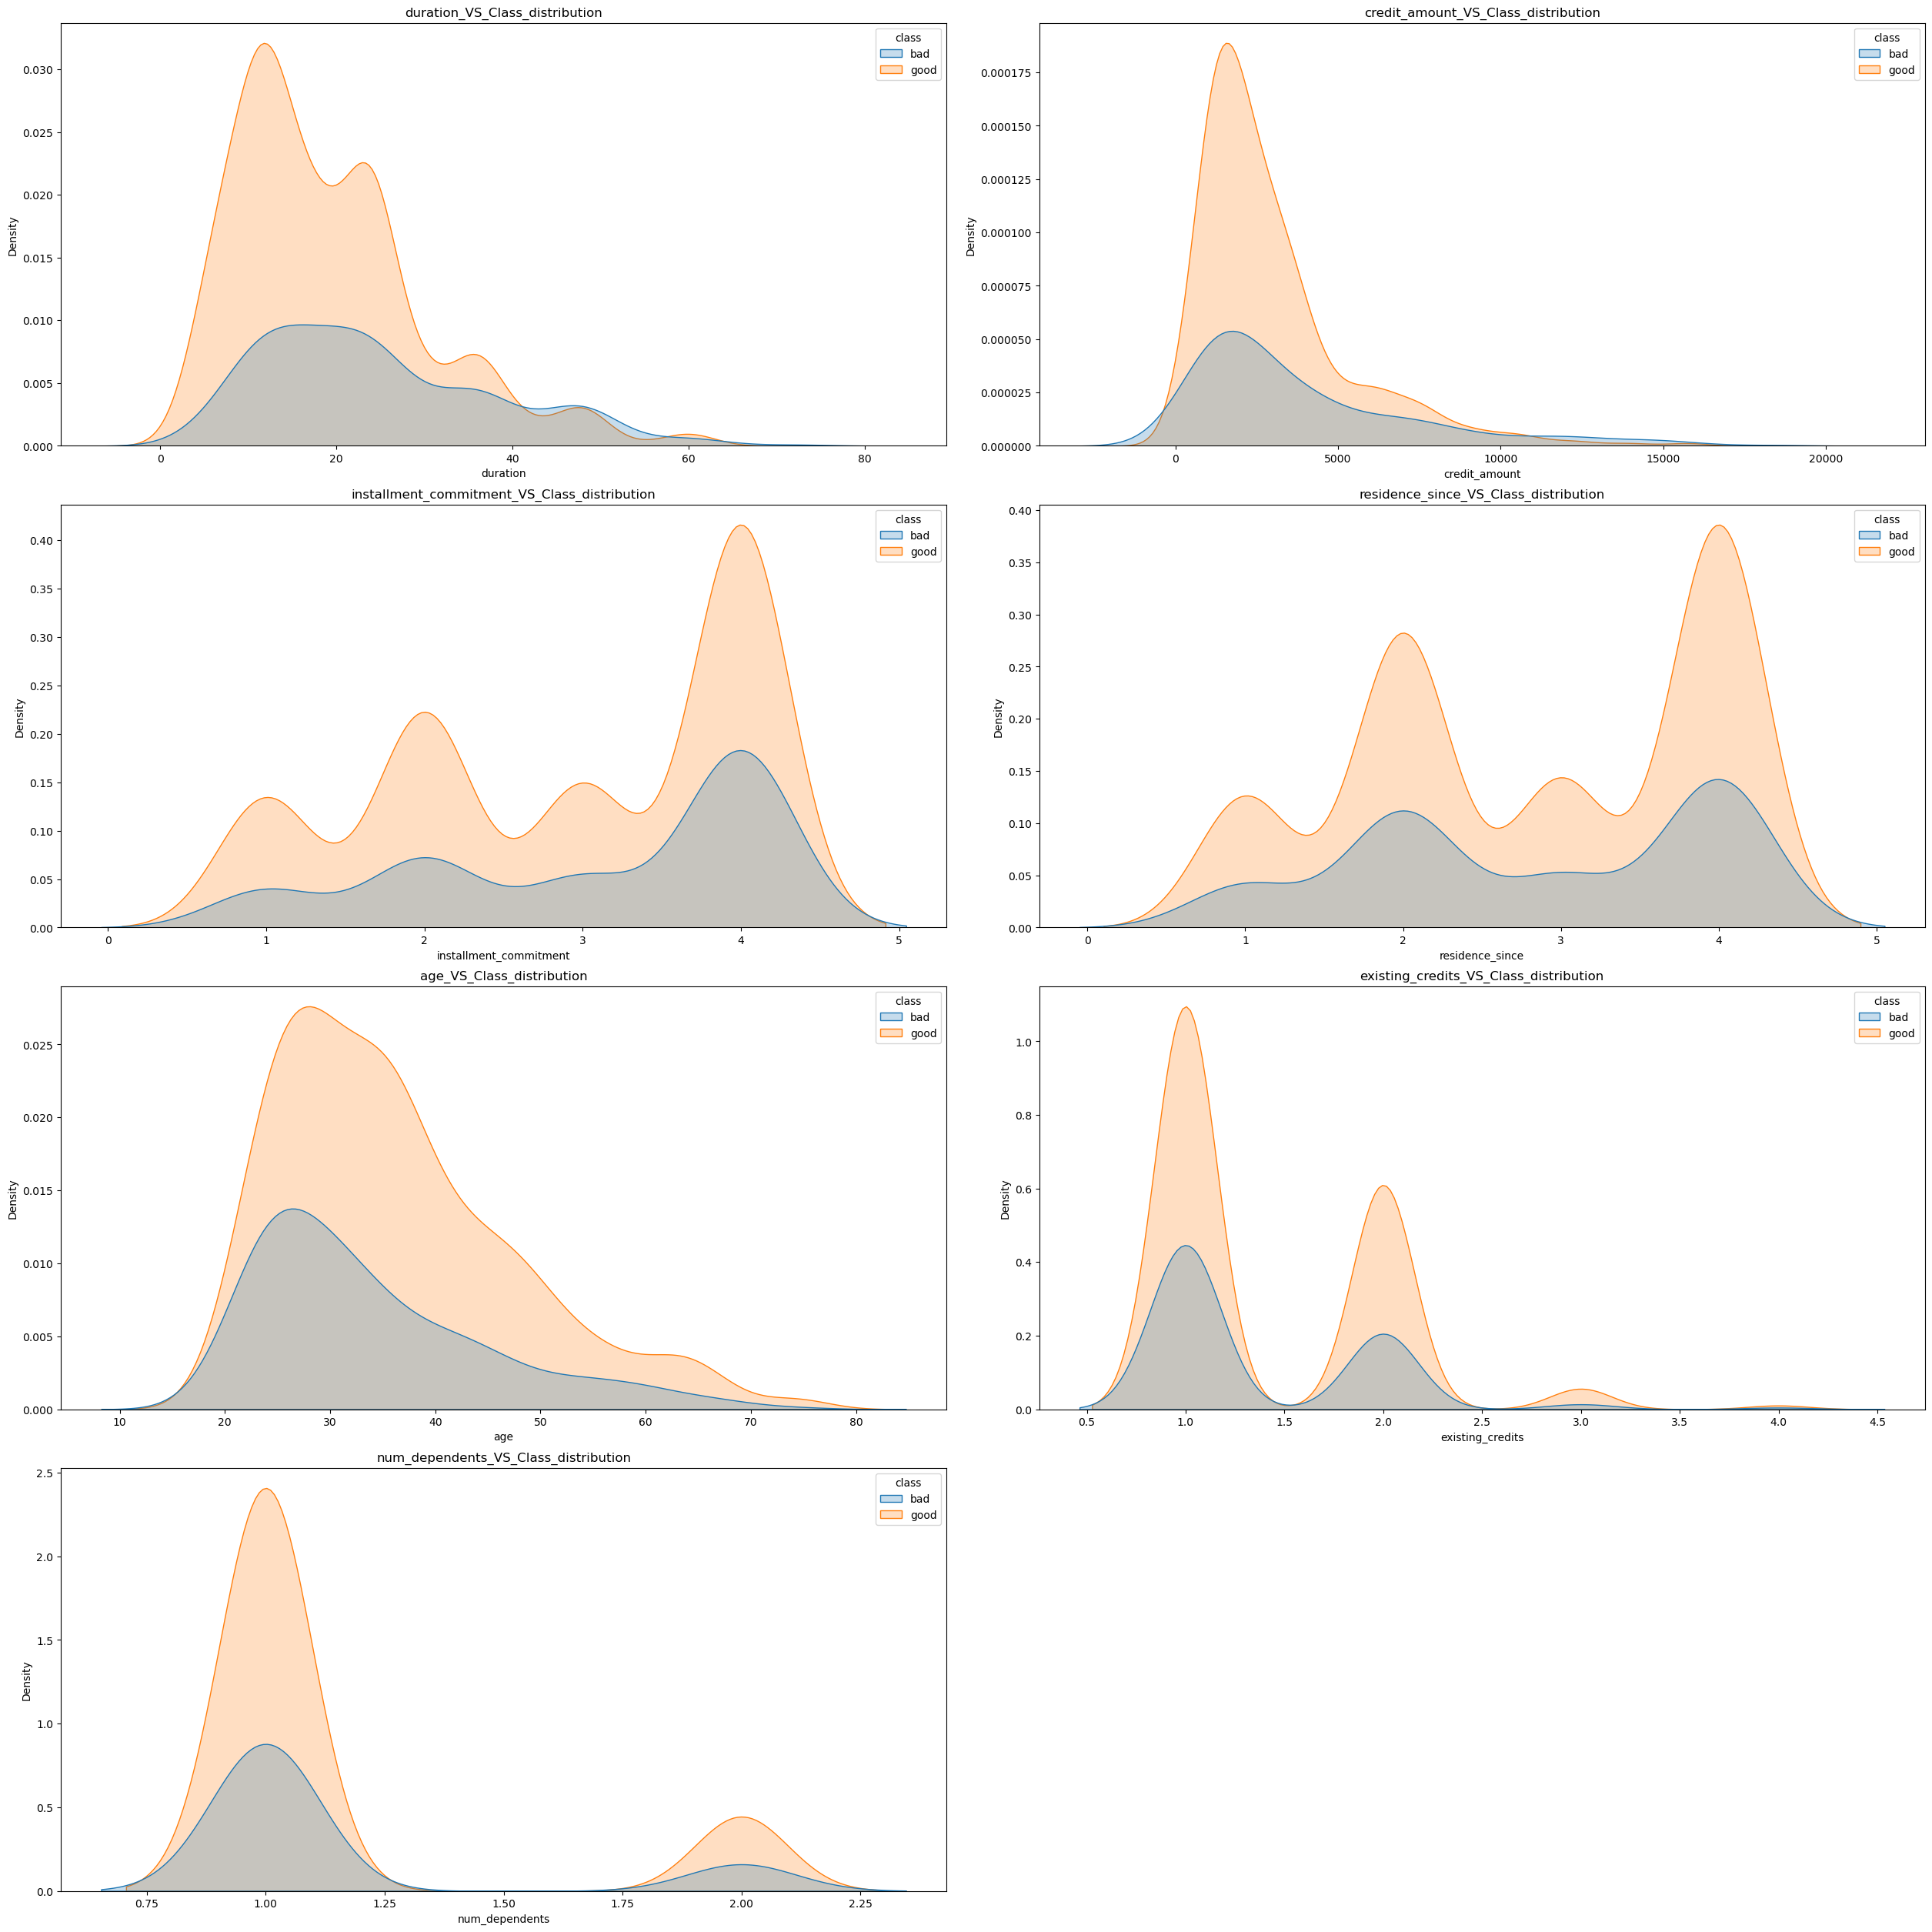

In [15]:
lst=['duration', 'credit_amount', 'installment_commitment','residence_since', 'age', 'existing_credits', 'num_dependents']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=credit,x=lst[i],hue='class',shade=True)
    plt.title(lst[i]+'_VS_Class_distribution')
plt.show()

* Visualizing Categorical Features against the target feature (KDEplot)

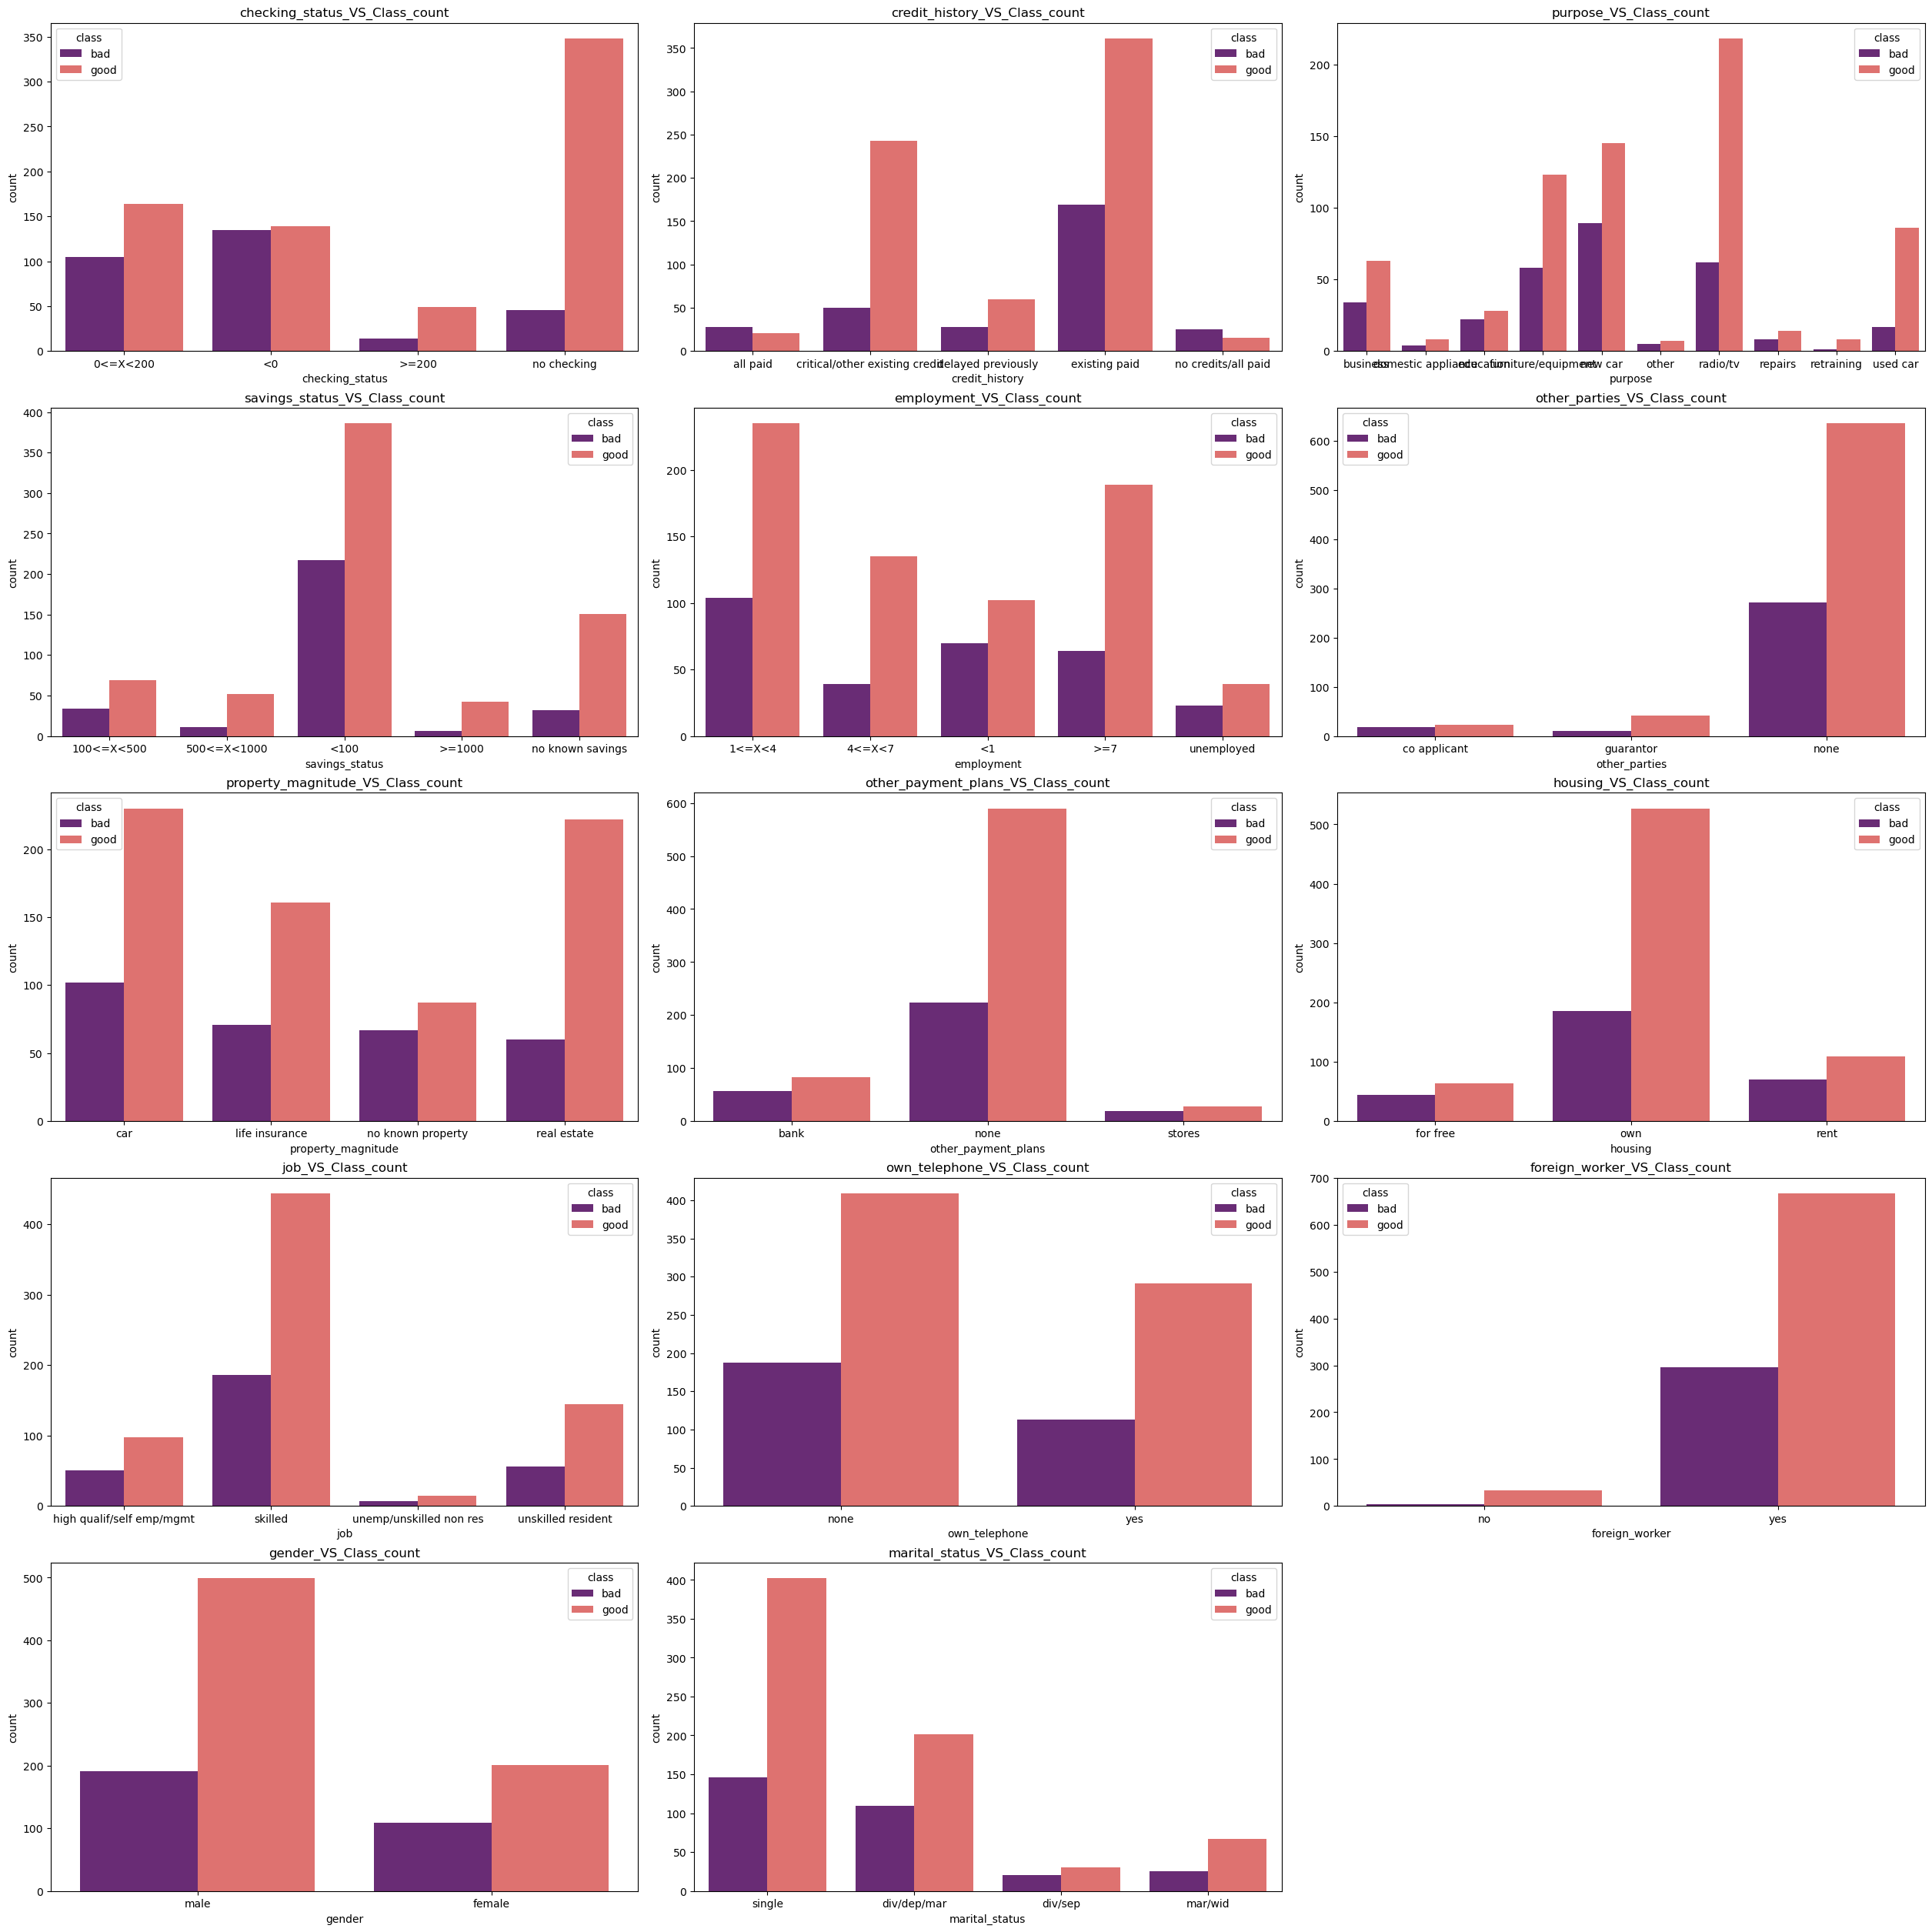

In [16]:
lst=['checking_status', 'credit_history', 'purpose', 'savings_status','employment', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone',
     'foreign_worker', 'gender', 'marital_status']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=credit,x=lst[i],palette='magma',hue='class')
    plt.title(lst[i]+'_VS_Class_count')
plt.show()

# **Label Encoding & Data Scaling**

In [17]:
# Label Encoding & Scaling
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [18]:
# Label Encoding
for i in list(cat.columns):
    credit[i+'_encoder']=LabelEncoder().fit_transform(credit[i])

# Taking only numerical features
num=credit.select_dtypes(include=[np.number])

# Data Scaling
scl=pd.DataFrame(MinMaxScaler().fit_transform(num.to_numpy()),columns=num.columns)

# Scaled Data
scl.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_encoder,credit_history_encoder,purpose_encoder,...,other_parties_encoder,property_magnitude_encoder,other_payment_plans_encoder,housing_encoder,job_encoder,own_telephone_encoder,foreign_worker_encoder,class_encoder,gender_encoder,marital_status_encoder
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.333333,0.25,0.666667,...,1.0,1.000000,0.5,0.5,0.333333,1.0,1.0,1.0,1.0,1.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.000000,0.75,0.666667,...,1.0,1.000000,0.5,0.5,0.333333,0.0,1.0,0.0,0.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1.000000,0.25,0.222222,...,1.0,1.000000,0.5,0.5,1.000000,0.0,1.0,1.0,1.0,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.333333,0.75,0.333333,...,0.5,0.333333,0.5,0.0,0.333333,0.0,1.0,1.0,1.0,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.333333,0.50,0.444444,...,1.0,0.666667,0.5,0.0,0.333333,0.0,1.0,0.0,1.0,1.0


# **Machine Learning Model Building**

* Featutes & target for model building

In [19]:
x=scl.drop('class_encoder',axis=1)
y=scl['class_encoder']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

* Defining functions for model building

In [20]:

# Logistic Regreesion Model
def model_lr(x_train,x_test,y_train,y_test):
    global acc_lr,f1_lr

    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_lr=confusion_matrix(y_test,y_pred)
    acc_lr=accuracy_score(y_test,y_pred)
    f1_lr=f1_score(y_test,y_pred)
    clf_lr=classification_report(y_test,y_pred)

    print('*********** Logistic Regression***********')
    print('\n')
    print('Accuracy : ',acc_lr)
    print('F1 Score : ',f1_lr)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_lr)
    print(10*'=====')
    print('Classification Report :\n',clf_lr)
    print(30*'========')

# Naive Bayes Model
def model_nb(x_train,x_test,y_train,y_test):
    global acc_nb,f1_nb

    lr=GaussianNB()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_nb=confusion_matrix(y_test,y_pred)
    acc_nb=accuracy_score(y_test,y_pred)
    f1_nb=f1_score(y_test,y_pred)
    clf_nb=classification_report(y_test,y_pred)

    print('***********Gaussian Naive Bayes***********')
    print('\n')
    print('Accuracy : ',acc_nb)
    print('F1 Score : ',f1_nb)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_nb)
    print(10*'=====')
    print('Classification Report :\n',clf_nb)
    print(30*'========')

# Decision Tree Model
def model_dt(x_train,x_test,y_train,y_test):
    global acc_dt,f1_dt

    lr=DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_dt=confusion_matrix(y_test,y_pred)
    acc_dt=accuracy_score(y_test,y_pred)
    f1_dt=f1_score(y_test,y_pred)
    clf_dt=classification_report(y_test,y_pred)

    print('***********Decision Tree***********')
    print('\n')
    print('Accuracy : ',acc_dt)
    print('F1 Score : ',f1_dt)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_dt)
    print(10*'=====')
    print('Classification Report :\n',clf_dt)
    print(30*'========')

# K Nearest Neighbor Model
def model_knn(x_train,x_test,y_train,y_test):
    global acc_knn,f1_knn

    lr=KNeighborsClassifier()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_knn=confusion_matrix(y_test,y_pred)
    acc_knn=accuracy_score(y_test,y_pred)
    f1_knn=f1_score(y_test,y_pred)
    clf_knn=classification_report(y_test,y_pred)

    print('***********K Nearest Neighbor***********')
    print('\n')
    print('Accuracy : ',acc_knn)
    print('F1 Score : ',f1_knn)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_knn)
    print(10*'=====')
    print('Classification Report :\n',clf_knn)
    print(30*'========')

# Random Forest Model
def model_rf(x_train,x_test,y_train,y_test):
    global acc_rf,f1_rf

    lr=RandomForestClassifier()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_rf=confusion_matrix(y_test,y_pred)
    acc_rf=accuracy_score(y_test,y_pred)
    f1_rf=f1_score(y_test,y_pred)
    clf_rf=classification_report(y_test,y_pred)

    print('***********Random Forest***********')
    print('\n')
    print('Accuracy : ',acc_rf)
    print('F1 Score : ',f1_rf)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_rf)
    print(10*'=====')
    print('Classification Report :\n',clf_rf)
    print(30*'========')

# Adaptive Boosting Model
def model_ab(x_train,x_test,y_train,y_test):
    global acc_ab,f1_ab

    lr=AdaBoostClassifier()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_ab=confusion_matrix(y_test,y_pred)
    acc_ab=accuracy_score(y_test,y_pred)
    f1_ab=f1_score(y_test,y_pred)
    clf_ab=classification_report(y_test,y_pred)

    print('***********Adaptive Boosting***********')
    print('\n')
    print('Accuracy : ',acc_ab)
    print('F1 Score : ',f1_ab)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_ab)
    print(10*'=====')
    print('Classification Report :\n',clf_ab)
    print(30*'========')

# **Model Evaluation**

In [21]:
# Model Evaluation
model_lr(x_train,x_test,y_train,y_test)
model_nb(x_train,x_test,y_train,y_test)
model_dt(x_train,x_test,y_train,y_test)
model_knn(x_train,x_test,y_train,y_test)
model_rf(x_train,x_test,y_train,y_test)
model_ab(x_train,x_test,y_train,y_test)

*********** Logistic Regression***********


Accuracy :  0.7266666666666667
F1 Score :  0.8247863247863247
Confusion Matrix :
 [[ 25  61]
 [ 21 193]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.54      0.29      0.38        86
         1.0       0.76      0.90      0.82       214

    accuracy                           0.73       300
   macro avg       0.65      0.60      0.60       300
weighted avg       0.70      0.73      0.70       300

***********Gaussian Naive Bayes***********


Accuracy :  0.7333333333333333
F1 Score :  0.812206572769953
Confusion Matrix :
 [[ 47  39]
 [ 41 173]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.53      0.55      0.54        86
         1.0       0.82      0.81      0.81       214

    accuracy                           0.73       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.74      0.73      0.73       30

# **Model Performance Comparison**

In [22]:
# Creating tabular format for better comparison
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regreesion','Gaussian NB','Decision Tree','KNN','Random Forest','Adaptive Boosting'])
tbl['Accuracy']=pd.Series([acc_lr,acc_nb,acc_dt,acc_knn,acc_rf,acc_ab])
tbl['F1_Score']=pd.Series([f1_lr,f1_nb,f1_dt,f1_knn,f1_rf,f1_ab])
tbl.set_index('Model')

,Accuracy,F1_Score
Model,,
Logistic Regreesion,0.726667,0.824786
Gaussian NB,0.733333,0.812207
Decision Tree,0.686667,0.778302
KNN,0.686667,0.788288
Random Forest,0.760000,0.844156
Adaptive Boosting,0.750000,0.834437


In [23]:
# Best model on the basis of F1 Score
tbl.sort_values('F1_Score',ascending=False)

,Model,Accuracy,F1_Score
4,Random Forest,0.760000,0.844156
5,Adaptive Boosting,0.750000,0.834437
0,Logistic Regreesion,0.726667,0.824786
1,Gaussian NB,0.733333,0.812207
3,KNN,0.686667,0.788288
2,Decision Tree,0.686667,0.778302


# **Cross Validation Method to avoid overfitting**


 LogisticRegression()
f1-Score(train): mean= (0.672), min=(0.657)) ,max= (0.684), stdev= (0.011)
f1-Score(test): 0.6725

 GaussianNB()
f1-Score(train): mean= (0.700), min=(0.609)) ,max= (0.762), stdev= (0.051)
f1-Score(test): 0.7010

 DecisionTreeClassifier()
f1-Score(train): mean= (0.674), min=(0.653)) ,max= (0.726), stdev= (0.028)
f1-Score(test): 0.6870

 KNeighborsClassifier()
f1-Score(train): mean= (0.699), min=(0.677)) ,max= (0.732), stdev= (0.020)
f1-Score(test): 0.7009

 RandomForestClassifier()
f1-Score(train): mean= (0.723), min=(0.704)) ,max= (0.741), stdev= (0.014)
f1-Score(test): 0.7308

 AdaBoostClassifier()
f1-Score(train): mean= (0.733), min=(0.704)) ,max= (0.766), stdev= (0.023)
f1-Score(test): 0.7336


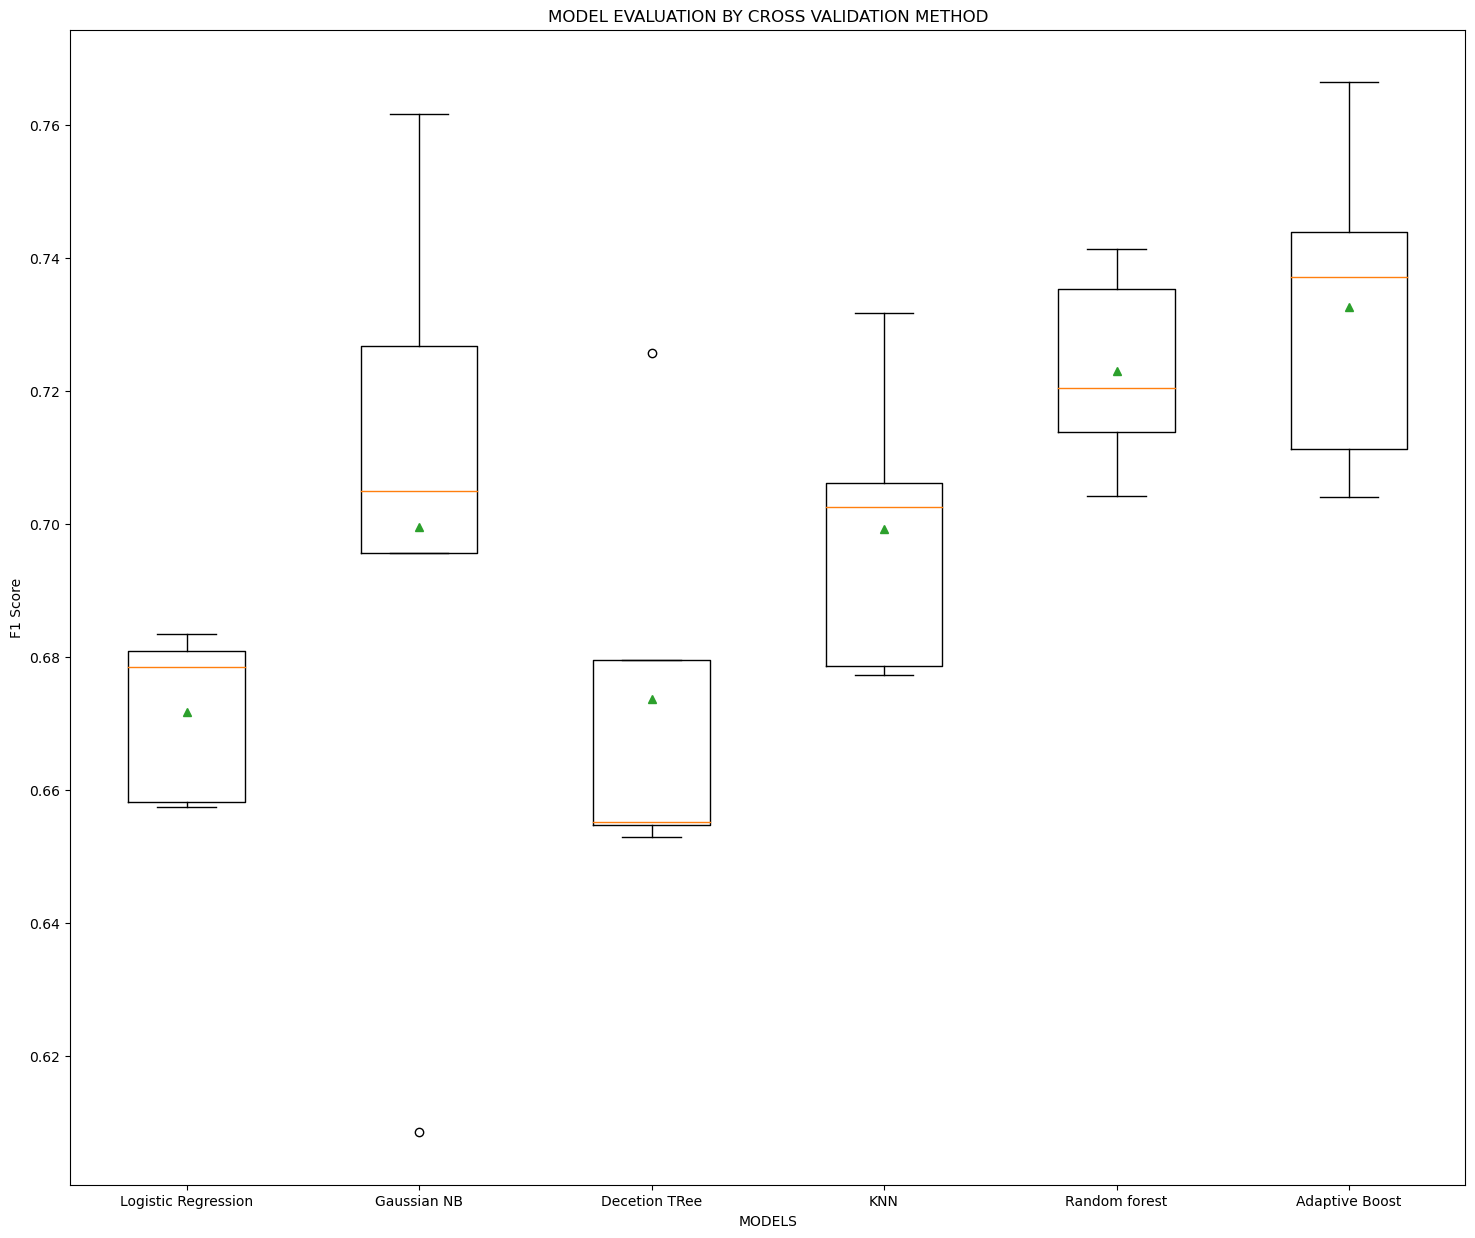

In [24]:
# Using cross validation method to avoid overfitting
import statistics as st
###############################################################################
# Model building
lr =LogisticRegression()
nb=GaussianNB()
dct=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
m  =[lr,nb,dct,knn,rf,ab]
model_name=['Logistic Regression','Gaussian NB','Decetion TRee','KNN','Random forest','Adaptive Boost']

results, mean_results, p, f1_test=list(),list(),list(),list()

################################################################################
#Model fitting,cross-validating and evaluating performance

def algor(model):
    print('\n',i)
    pipe=Pipeline([('model',model)])
    pipe.fit(x_train,y_train)
    cv=StratifiedKFold(n_splits=5)
    n_scores=cross_val_score(pipe,x_train,y_train,scoring='f1_weighted',cv=cv,n_jobs=-1,error_score='raise') # As it is an Imbalance data so f1 score will give a better accuracy than normal accuracy.
    results.append(n_scores)
    mean_results.append(st.mean(n_scores))
    print('f1-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f), stdev= (%.3f)'%(st.mean(n_scores), min(n_scores), max(n_scores),np.std(n_scores)))
    y_pred=cross_val_predict(model,x_train,y_train,cv=cv)
    p.append(y_pred)
    f1=f1_score(y_train,y_pred, average = 'weighted')
    f1_test.append(f1)
    print('f1-Score(test): %.4f'%(f1))

for i in m:
    algor(i)

###############################################################################
# Model comparison By Visualizing 

fig=plt.subplots(figsize=(18,15))
plt.title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
plt.xlabel('MODELS')
plt.ylabel('F1 Score')
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()

* From the above diagram we can see that after applying the cross validation method Adaptive Boosting method perfomrs best(f1 Score) among all the models. So we are going for the Hyperparameter tuning of Adaptive boosting

# **Hyper Parameter Tuning**

In [25]:
# defining the classifier
model = AdaBoostClassifier(random_state=1)

# creating a dic for the grid
grid = dict()

# estimator till 500
grid['n_estimators'] = [10, 50, 100, 200, 500]

# defining learning rate
grid['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]


# defining the CV
cv = StratifiedKFold(n_splits=5)

# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,cv=cv,scoring='f1_weighted')


# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(x_train,y_train)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.733287 using {'learning_rate': 1.1, 'n_estimators': 10}


* Hyperparameter tuned model without cross validation technique

In [26]:
#Tuned Model for prediction
x=scl.drop('class_encoder',axis=1)
y=scl['class_encoder']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)



ab=AdaBoostClassifier(learning_rate= 1.1, n_estimators = 10,random_state=1)

ab.fit(x_train,y_train)
y_pred=ab.predict(x_test)
# Model Evaluation
    
conf=confusion_matrix(y_test,y_pred)
acc_ab=accuracy_score(y_test,y_pred)
f1_ab=f1_score(y_test,y_pred,average='weighted')

print('Accuracy: ',acc_ab)
print('F1 Score: ',f1_ab)
print(10*'===========')
print('Confusion Matrix: \n',conf)
print(10*'===========')
print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy:  0.75
F1 Score:  0.7256869772998806
Confusion Matrix: 
 [[ 30  56]
 [ 19 195]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.61      0.35      0.44        86
         1.0       0.78      0.91      0.84       214

    accuracy                           0.75       300
   macro avg       0.69      0.63      0.64       300
weighted avg       0.73      0.75      0.73       300



# **Hyper Parameter Tuned Model with Cross Validation Method**

In [27]:
ab= AdaBoostClassifier(learning_rate= 1.1, n_estimators = 10,random_state=1)
cv=StratifiedKFold(n_splits=5)
n_scores=cross_val_score(ab,x_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise',)
y_pred=cross_val_predict(ab,x_train,y_train,cv=cv)


acc_tst=accuracy_score(y_train,y_pred)


print('***********AdaBoost Accuracy***********')
print('\n')
print('Testing Accuracy Score : ',acc_tst)

***********AdaBoost Accuracy***********


Testing Accuracy Score :  0.7414285714285714


In [28]:
ab= AdaBoostClassifier(learning_rate= 1.1, n_estimators = 10,random_state=1)
cv=StratifiedKFold(n_splits=5)
n_scores=cross_val_score(ab,x_train,y_train,scoring='f1_weighted',cv=cv,n_jobs=-1,error_score='raise')
y_pred=cross_val_predict(ab,x_train,y_train,cv=cv)


f1=f1_score(y_train,y_pred, average = 'weighted')


print('***********AdaBoost F1***********')
print('\n')
print('F1 Score : ',f1)

***********AdaBoost F1***********


F1 Score :  0.7353290829203646


# **Thank You For Going Through**